In [29]:
import numpy as np
import matplotlib.pyplot as plt


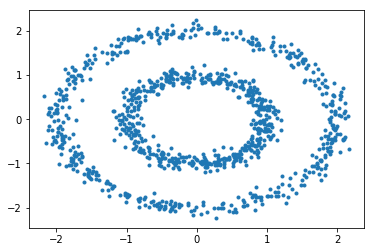

In [219]:
mu = 0
sigma = 1
sampleNo = 500
np.random.seed(0)
r1 = 1 + 0.1 *np.random.normal(mu, sigma, sampleNo )
r2 =2 + 0.1 * np.random.normal(mu, sigma, sampleNo)
q1 = np.random.random(size=sampleNo) * 2 * np.pi
q2 = np.random.random(size=sampleNo) * 2 * np.pi
x1,x2 = np.array(r1 * np.cos(q1)),np.array(r2 * np.cos(q2))
x = np.concatenate((x1,x2))
y1, y2 = np.array(r1 * np.sin(q1)), np.array(r2 * np.sin(q2))
y = np.concatenate((y1,y2))
plt.plot(x,y,'.')
plt.show()
data = np.dstack((x,y))[0]

500
(500,)


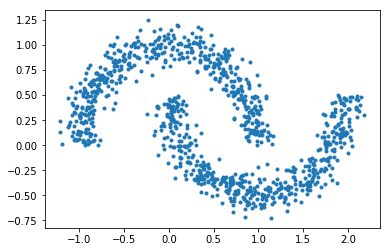

(1000, 2)


In [213]:
mu = 0
sigma = 1
sampleNo = 500
np.random.seed(0)
r1 = 1 + 0.1 *np.random.normal(mu, sigma, sampleNo )
r2 =1 + 0.1 * np.random.normal(mu, sigma, sampleNo) 
q1 = np.random.random(size=sampleNo)  * np.pi
q2 = - np.random.random(size=sampleNo)  * np.pi
x1,x2 = np.array(r1 * np.cos(q1)),np.array(r2 * np.cos(q2)) + 1
x = np.concatenate((x1,x2))
y1, y2 = np.array(r1 * np.sin(q1)), np.array(r2 * np.sin(q2)) + 0.5
y = np.concatenate((y1,y2))
print(r1.shape[0])
print(r2.shape)
plt.plot(x,y,'.')
plt.show()
data = np.dstack((x,y))[0]
print(data.shape)

500
(500,)


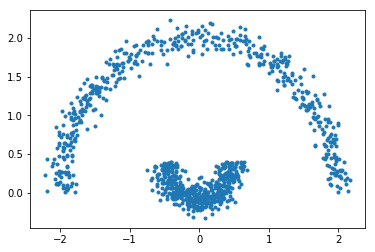

(1000, 2)


In [236]:
mu = 0
sigma = 1
sampleNo = 500
np.random.seed(0)
r1 = 2 + 0.1 *np.random.normal(mu, sigma, sampleNo )
r2 = 0.5  + 0.1 * np.random.normal(mu, sigma, sampleNo) 
q1 = np.random.random(size=sampleNo)  * np.pi 
q2 =  np.random.random(size=sampleNo)  * np.pi 
x1,x2 = np.array(r1 * np.cos(q1)),np.array(r2 * np.cos(q2)) 
x = np.concatenate((x1,x2))
y1, y2 = np.array(r1 * np.sin(q1)) , -np.array(r2 * np.sin(q2)) + 0.4
y = np.concatenate((y1,y2))
print(r1.shape[0])
print(r2.shape)
plt.plot(x,y,'.')
plt.show()
data = np.dstack((x,y))[0]
print(data.shape)

In [237]:
def initCenter(data, k):
    sampleNo, dim = data.shape
    center = np.zeros((k,dim))
    for i in range(k):
        index = np.random.randint(0, sampleNo)
        center[i] = data[index]
    return center

center = initCenter(data, 4)
print(center)

k = 4
sampleNo, dim = data.shape
clusterAss = np.zeros((sampleNo, 2))# first column is cluster number, second is distance of data and its center
change = True
center  = initCenter(data, k) # step1 : initiate centers
while change:
    change = False
    for i in range(sampleNo):# step2 : assign data to its closest center
        mindis = 1000
        mindisIndex = 0
        for j in range(k):
            dis = np.linalg.norm(center[j] - data[i])
            if dis < mindis:
                mindisIndex = j
                mindis = dis
        if clusterAss[i][0] != mindisIndex:
            clusterAss[i][0] = mindisIndex
            clusterAss[i][1] = mindis
            change = True
print(clusterAss)

index0 = clusterAss[:,0] == 0
index1 = clusterAss[:,0] == 1
index2 = clusterAss[:,0] == 2
index3 = clusterAss[:,0] == 3
new_center = np.mean(data[index0], axis = 0)
print(new_center)
print(data[index0].shape)
print(data[index1].shape)
print(data[index2].shape)
print(data[index3].shape)

In [242]:
def KMeans(data, k):
    sampleNo, dim = data.shape
    clusterAss = np.zeros((sampleNo, 2))# first column is cluster number, second is distance of data and its center
    change = True
    center  = initCenter(data, k) # step1 : initiate centers
    dist = []
    while change:
        change = False
        for i in range(sampleNo):# step2 : assign data to its closest center
            mindis = 1000
            mindisIndex = 0
            for j in range(k):
                dis = np.linalg.norm(center[j] - data[i])
                if dis < mindis:
                    mindisIndex = j
                    mindis = dis
            if clusterAss[i][0] != mindisIndex:
                clusterAss[i][0] = mindisIndex
                clusterAss[i][1] = mindis
                change = True
            # step3: update centers
        for i in range(k):
            index = clusterAss[:,0] == j
            new_center = np.mean(data[index0], axis = 0)
            center[j] = new_center
        dist.append(np.sum(np.square(clusterAss[:,1]), axis = 0))
    #sum_dist = np.sum(np.square(clusterAss[:,1]), axis = 0)
    return clusterAss, center, dist         

In [243]:
clusterAss, center, dist = KMeans(data, 2)
print(center)
print(dist)
print(k)

[[-0.3595156  -0.02769523]
 [-0.9552923   0.72689436]]
[1312.2320227771736, 1708.0322533867618, 1708.0322533867618]
4


def grid_search(data):
    k = [7,8,9,10,20]
    best_parameter = {}
    for i in k:
        min_dist = 5000
        clusterAss, center, sum_dist = KMeans(data, i)
        dist = np.min(sum_dist)
        if dist<min_dist:
            best_parameter['clusterAss'] = clusterAss
            best_parameter['center'] = center
            best_parameter['sum_dist'] = sum_dist
            kb = i
    return best_parameter, kb

best_parameter, k = grid_search(data)
clusterAss = best_parameter['clusterAss'] 
center = best_parameter['center']
sum_dist = best_parameter['sum_dist']
print(k)
print(clusterAss)
print(center)
print(sum_dist)

In [244]:
def plotResult(x , y , clusterAss, center,k):
    color = ['#F0F8FF','#FAEBD7','#00FFFF', '#7FFFD4','#F0FFFF','#F5F5DC','#FFE4C4','#000000','#FFEBCD','#0000FF','#8A2BE2',
'#A52A2A']
    for i in range(k):
        index = clusterAss[:,0] == i
        plt.plot(x[index], y[index],'.')
        #plt.plot(center[i][0], center[i][1], '*', color = 'k', markersize = 10)
    plt.show()

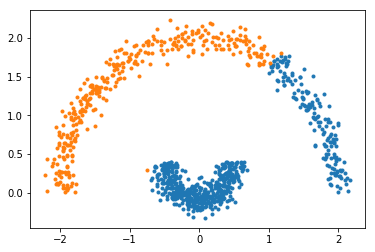

In [245]:
plotResult(x , y , clusterAss, center, k)

index = clusterAss[:,0] == i
print(x[index], y[index])

print(index)